In [54]:
import pandas as pd

In [55]:
football_data = pd.read_csv("AmericanFootBall98.csv")

In [ ]:
display(football_data)

Qual time teve o melhor desempenho médio em termos de vitórias durante o período de 1998 a 2019? E qual teve o pior desempenho?

In [5]:
football_data['team'] = football_data['team_code'].str[:-4]
average_wins = football_data.groupby('team')['wins'].mean()
average_wins_sorted = average_wins.sort_values()

print(f"O time com pior desempenho de 1998 a 2019 foi: {average_wins_sorted.index[0]}, seu desempenho de vitórias e derrotas foi de: {round(average_wins_sorted.iloc[0], 2)}")
print(f"O time com melhor desempenho de 1998 a 2019 foi: {average_wins_sorted.index[-1]}, seu desempenho de vitórias e derrotas foi de: {round(average_wins_sorted.iloc[-1], 2)}")

O time com pior desempenho de 1998 a 2019 foi: cle, seu desempenho de vitórias e derrotas foi de: 4.81
O time com melhor desempenho de 1998 a 2019 foi: nwe, seu desempenho de vitórias e derrotas foi de: 11.67


Quais são os times com a maior média de jardas por tentativa de passe (net yards per pass att) em 2019?

In [6]:
football_data['year'] = football_data['team_code'].str[-4:]
football_data_2019 = football_data[football_data['year'] == '2019']
media_por_equipe = football_data_2019.groupby('team')['net yards per pass att'].mean()

print("Os 5 maiores times com mais jardas por tentativas de passe:")
print(media_por_equipe.sort_values(ascending=False)[:5])


Os 5 maiores times com mais jardas por tentativas de passe:
team
dal    7.7
kan    7.5
sfo    7.4
tam    7.2
min    7.1
Name: net yards per pass att, dtype: float64


Quais times tiveram a melhor média de jardas por jogo (avg yards per drive) em 2011?

In [14]:
football_data_2011 = football_data[football_data['year'] == '2011']
media_jardas_por_equipe = football_data_2011.groupby('team')['avg yards per drive'].mean()
media_jardas_por_equipe.sort_values()

print("Os 5 times com mais jardas por jogo:")
print(media_jardas_por_equipe[:5])

Os 5 times com mais jardas por jogo:
team
atl    32.2
buf    29.8
car    34.8
chi    25.2
cin    26.0
Name: avg yards per drive, dtype: float64


Como a média de jardas por tentativa de corrida (rush yards per att) evoluiu ao longo dos anos?

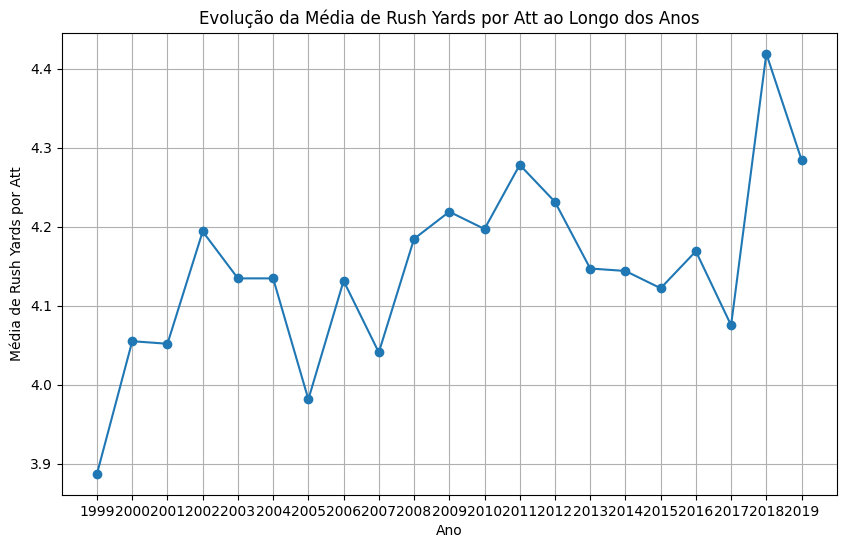

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('AmericanFootball98.csv')

df['year'] = df['team_code'].str[-4:]
media_por_ano = df.groupby('year')['rush yards per att'].mean()

plt.figure(figsize=(10, 6))
plt.plot(media_por_ano.index, media_por_ano.values, marker='o', linestyle='-')
plt.xlabel('Ano')
plt.ylabel('Média de Rush Yards por Att')
plt.title('Evolução da Média de Rush Yards por Att ao Longo dos Anos')
plt.grid(True)
plt.show()

Quais times têm a melhor média de turnovers forçados (opp TO) em 2019?

In [18]:
import pandas as pd

df = pd.read_csv('AmericanFootball98.csv')
df['year'] = df['team_code'].str[-4:]
df['team'] = df['team_code'].str[:-4]

df_2019 = df[df['year'] == '2019']
media_turnovers_forcados = df_2019.groupby('team')['opp TO'].mean()

melhores_times = media_turnovers_forcados.sort_values(ascending=False)

print("Times com a melhor média de turnovers forçados em 2019:")
display(melhores_times)

Times com a melhor média de turnovers forçados em 2019:


team
pit    38.0
nwe    36.0
sea    32.0
min    31.0
tam    28.0
sfo    27.0
rav    25.0
gnb    25.0
ram    24.0
kan    23.0
clt    23.0
oti    23.0
nor    23.0
buf    23.0
was    22.0
htx    22.0
car    21.0
nyj    21.0
atl    20.0
phi    20.0
cle    20.0
chi    19.0
jax    19.0
det    18.0
crd    17.0
dal    17.0
den    17.0
cin    16.0
nyg    16.0
mia    16.0
rai    15.0
sdg    14.0
Name: opp TO, dtype: float64

Existe uma correlação entre o número de penalidades (penalties) cometidas e o número de vitórias?

In [19]:
import pandas as pd

df = pd.read_csv('AmericanFootball98.csv')

correlacao = df['penalties'].corr(df['wins'])

print(f"Correlação entre Penalidades e Vitórias: {correlacao:.2f}")

Correlação entre Penalidades e Vitórias: -0.13


Como a média de tempo por unidade de drive (avg time per drive) varia entre times vitoriosos e times perdedores?

In [51]:
import pandas as pd

df = pd.read_csv('AmericanFootball98.csv')
df['team'] = df['team_code'].str[:-4]
pd.set_option('display.max_rows', df.shape[0]+1)
pd.set_option('display.max_columns', None)

df['avg time per drive'] = df['avg time per drive'].str.split(':').apply(lambda x: int(x[0]) + int(x[1]) / 60)

times_vitoriosos = df[df['wins'] > 10]
times_perdedores = df[df['wins'] < 6]

media_tempo_vitoriosos = times_vitoriosos['avg time per drive'].mean()
media_tempo_perdedores = times_perdedores['avg time per drive'].mean()

print(f"Média de Tempo por Unidade de Drive para Times Vitoriosos: {media_tempo_vitoriosos:.2f}")
print(f"Média de Tempo por Unidade de Drive para Times Perdedores: {media_tempo_perdedores:.2f}")


Média de Tempo por Unidade de Drive para Times Vitoriosos: 2.72
Média de Tempo por Unidade de Drive para Times Perdedores: 2.48


Houve uma mudança significativa na média de pontos por jogo (avg points per drive) ao longo dos anos?

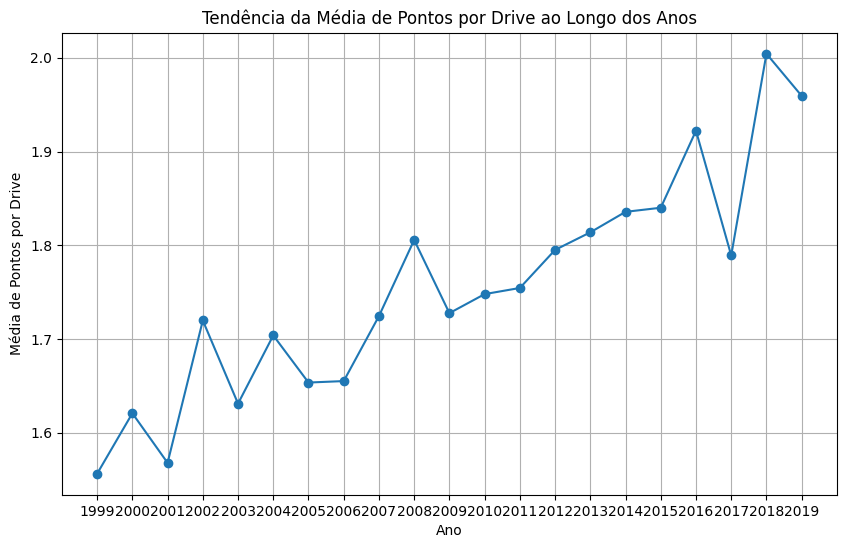

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('AmericanFootball98.csv')

df['year'] = df['team_code'].str[-4:]
media_pontos_por_drive = df.groupby('year')['avg points per drive'].mean()

plt.figure(figsize=(10, 6))
plt.plot(media_pontos_por_drive.index, media_pontos_por_drive.values, marker='o', linestyle='-')
plt.xlabel('Ano')
plt.ylabel('Média de Pontos por Drive')
plt.title('Tendência da Média de Pontos por Drive ao Longo dos Anos')
plt.grid(True)
plt.show()


Qual a média de jardas por tentativa de passe (pass yards/ pass attempts) para todos os times em um determinado ano, por exemplo, 2010?

Existe uma correlação entre a média de pontos marcados por unidade de drive (avg points per drive) e o número de vitórias?

Quais são os times que tiveram a maior taxa de virada de jogo (turnover percentage) em 2019?